In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [85]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  This is separate from the ipykernel package so we can avoid doing imports until


In [86]:
all_df = pd.read_csv('/kaggle/input/commonlitreadabilityprize/train.csv')
df = all_df[['id', 'excerpt', 'target', 'standard_error']]

In [87]:
df.sort_values('target')['excerpt'].iloc[0]

'The commutator is peculiar, consisting of only three segments of a copper ring, while in the simplest of other continuous current generators several times that number exist, and frequently 120! segments are to be found. These three segments are made so as to be removable in a moment for cleaning or replacement. They are mounted upon a metal support, and are surrounded on all sides by a free air space, and cannot, therefore, lose their insulated condition. This feature of air insulation is peculiar to this system, and is very important as a factor in the durability of the commutator. Besides this, the commutator is sustained by supports carried in flanges upon the shaft, which flanges, as an additional safeguard, are coated all over with hard rubber, one of the finest known insulators. It may be stated, without fear of contradiction, that no other commutator made is so thoroughly insulated and protected. The three commutator segments virtually constitute a single copper ring, mounted i

In [88]:
df.sort_values('target')['excerpt'].iloc[-1]

'When you think of dinosaurs and where they lived, what do you picture? Do you see hot, steamy swamps, thick jungles, or sunny plains? Dinosaurs lived in those places, yes. But did you know that some dinosaurs lived in the cold and the darkness near the North and South Poles?\nThis surprised scientists, too. Paleontologists used to believe that dinosaurs lived only in the warmest parts of the world. They thought that dinosaurs could only have lived in places where turtles, crocodiles, and snakes live today. Later, these dinosaur scientists began finding bones in surprising places.\nOne of those surprising fossil beds is a place called Dinosaur Cove, Australia. One hundred million years ago, Australia was connected to Antarctica. Both continents were located near the South Pole. Today, paleontologists dig dinosaur fossils out of the ground. They think about what those ancient bones must mean.'

In [89]:
df['longitude'] = df['excerpt'].apply(lambda value: len(value))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:>

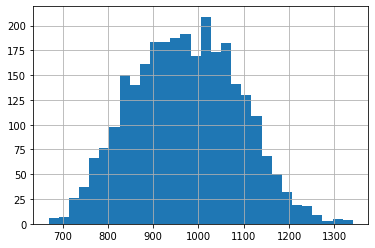

In [90]:
df['longitude'].hist(bins=30)
# we need to do something about the difference in the ammount of words per excerpt.

In [91]:
df['punctuation_marks'] = df['excerpt'].apply(lambda value: value.count('?') + value.count('.') + value.count(','))

In [94]:
def num_unique_words(text):
    text = text.lower()
    text = text.replace('?', '').replace('.', '').replace(',', '')
    
    text_set = set(text.split())
    return len(text_set)

df['num_diff_words'] = df['excerpt'].apply(lambda value: num_unique_words(value))

In [ ]:
df.describe()

In [95]:
# standarize numeric values by the number of words in the excerpt:
df['punctuation_marks'] = df['punctuation_marks'] / df['longitude']
df['num_diff_words'] = df['num_diff_words'] / df['longitude']

In [96]:
df.describe()

,target,standard_error,longitude,punctuation_marks,num_diff_words
count,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000
mean,-0.959319,0.491435,971.732886,0.021904,0.110373
std,1.033579,0.034818,117.257578,0.005996,0.011951
min,-3.676268,0.000000,669.000000,0.006682,0.040512
25%,-1.690320,0.468543,885.000000,0.017742,0.102213
50%,-0.912190,0.484721,971.000000,0.021176,0.111455
75%,-0.202540,0.506268,1058.000000,0.025538,0.118942
max,1.711390,0.649671,1341.000000,0.051383,0.142857


In [97]:
df.corr()

,target,standard_error,longitude,punctuation_marks,num_diff_words
target,1.000000,-0.085981,-0.362782,0.303610,0.148043
standard_error,-0.085981,1.000000,0.050975,0.023145,-0.075213
longitude,-0.362782,0.050975,1.000000,-0.232116,-0.439589
punctuation_marks,0.303610,0.023145,-0.232116,1.000000,0.208769
num_diff_words,0.148043,-0.075213,-0.439589,0.208769,1.000000


<AxesSubplot:xlabel='punctuation_marks', ylabel='num_diff_words'>

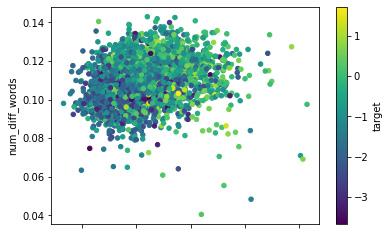

In [103]:
df.plot.scatter(x='punctuation_marks', y='num_diff_words', c='target', colormap='viridis')